# Analyzing Socioeconomic Indicators in Chicago data-set with SQL and Python




## Dataset Overview
The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Notebook, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database



In [2]:
# !pip install ipython-sql

In [3]:
%load_ext sql

In [4]:
import sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [5]:
%sql sqlite:///socioeconomic.db

### Store the dataset in a Table

##### To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the csv files  from the given url  into pandas dataframes

##### Next we will be using the  df.to_sql() function to convert each csv file  to a table in sqlite  with the csv data loaded in it.



In [6]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

##### You can verify that the table creation was successful by making a basic query like:


In [7]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Analyzing the Dataset

### How many rows are in the dataset?


In [8]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


### How many community areas in Chicago have a hardship index greater than 50.0?


In [9]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


### What is the maximum value of hardship index in this dataset?


In [10]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


### Which community area which has the highest hardship index?


In [11]:
#We can use the result of the last query to as an input to this query:
# %sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0;

#or another option:
# %sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC LIMIT 1;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data );

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


### Which Chicago community areas have per-capita incomes greater than $60,000?


In [12]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;


 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


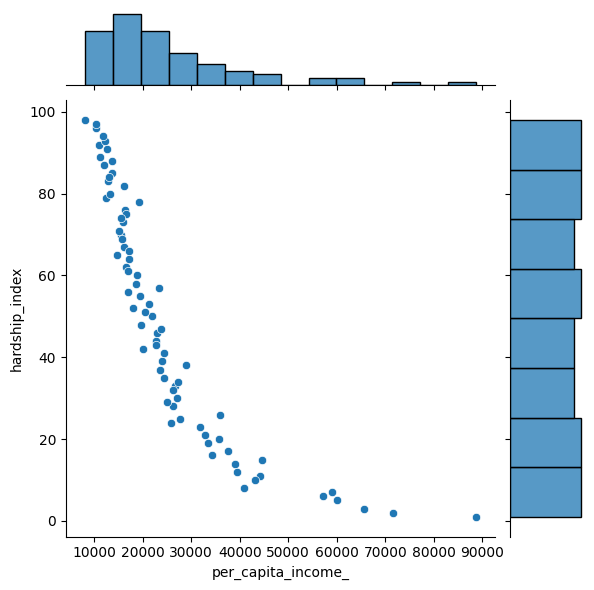

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot1 = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

##### You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables.

### Create a scatter plot using the variables `per_capita_income_` and `percent_households_below_poverty`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


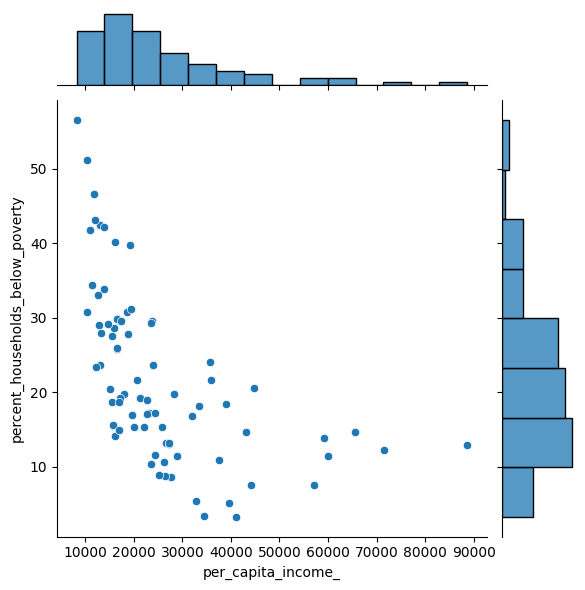

In [15]:
income_vs_households_below_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot2 = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_households_below_poverty.DataFrame())

##### You can see that as Per Capita Income rises as the percent of households below poverty decreases. We see that the points on the scatter plot are non linearly correlated in the negative direction, so we have a non linear negative correlation between the two variables.

### Create a scatter plot using the variables `per_capita_income_` and `percent_aged_16_unemployed`. Explain the correlation between the two variables.


 * sqlite:///socioeconomic.db
Done.


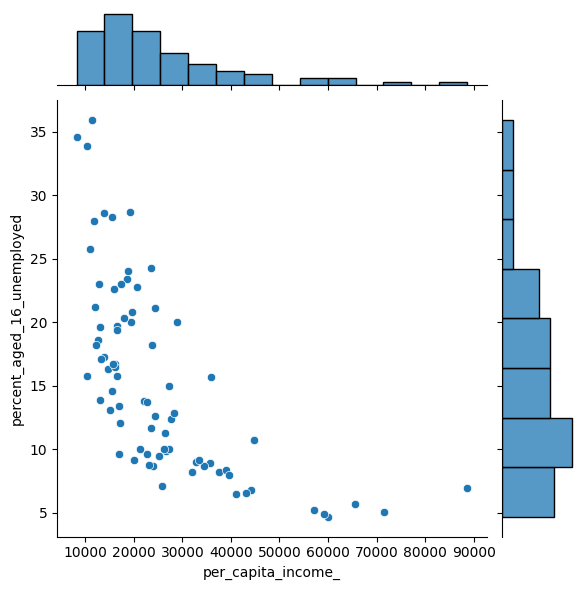

In [17]:
income_vs_aged_16_unemployed = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot2 = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_aged_16_unemployed.DataFrame())

##### You can see that as Per Capita Income rises as the percent of unemployed at age of 16 decreases. We see that the points on the scatter plot are non linearly correlated in the negative direction, so we have a non linear negative correlation between the two variables.

## Conclusion
In conclusion, our analysis of the socioeconomic indicators in Chicago reveals insightful trends concerning Per Capita Income and various measures of economic hardship. The data consistently shows a negative relationship between Per Capita Income and indicators of economic struggle, though the nature of these relationships varies.

1. **Hardship Index**: The negative correlation between Per Capita Income and the Hardship Index is evident, with a clear trend showing that as income rises, hardship diminishes. This relationship is somewhat linear, suggesting that increases in income are generally associated with reductions in overall hardship.

2. **Households Below Poverty**: The correlation between Per Capita Income and the percentage of households below the poverty line is non-linear but negative. This indicates that while higher income levels generally correspond to fewer households living in poverty, the rate of decrease is not uniform and may vary at different income levels.

3. **Unemployment Rate for Ages 16 and Up**: Similarly, the non-linear negative correlation between Per Capita Income and the unemployment rate for individuals aged 16 and older implies that rising income is associated with lower unemployment rates.

Overall, the analysis underscores a clear pattern: higher Per Capita Income tends to be associated with reduced economic hardship across multiple indicators. However, the non-linear relationships suggest that the impact of income on economic conditions is not uniform and may be influenced by various factors. This nuanced understanding of socioeconomic dynamics can help inform policy decisions and targeted interventions aimed at addressing economic disparities and improving overall well-being in Chicago.